In [1]:
import os

In [2]:
!gdown '1De8WmoXnR0xanzrN2NLPjSzAvpEtiQYC'
!gdown '1p0mVi3PxxCNPxT3GWzSsMtl_qjYxUr5q'

Downloading...
From: https://drive.google.com/uc?id=1De8WmoXnR0xanzrN2NLPjSzAvpEtiQYC
To: /content/LPCVC_Train_Updated.zip
100% 488M/488M [00:06<00:00, 78.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p0mVi3PxxCNPxT3GWzSsMtl_qjYxUr5q
To: /content/LPCVC_Val.zip
100% 48.0M/48.0M [00:00<00:00, 52.3MB/s]


In [3]:
!unzip ./LPCVC_Train_Updated.zip
!unzip ./LPCVC_Val.zip

Archive:  ./LPCVC_Train_Updated.zip
   creating: LPCVC_Train_Updated/LPCVC_Train_Updated/
   creating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/
   creating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/
   creating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/
  inflating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/train_0000.png  
  inflating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/train_0001.png  
  inflating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/train_0002.png  
  inflating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/train_0003.png  
  inflating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/train_0004.png  
  inflating: LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/train_0005.png  
  inflating: LPCVC

In [12]:
TRAIN_PATH = '/content/LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/IMG/train/'
GT_PATH = '/content/LPCVC_Train_Updated/LPCVC_Train_Updated/LPCVC_Train_Updated/GT_Updated/train/'

In [51]:
class_names = {'0': 'background',
 '1': 'avalanche',
 '2': 'building_undamaged',
 '3': 'building_damaged',
 '4': 'cracks/fissure/subsidence',
 '5': 'debris/mud//rock flow',
 '6': 'fire/flare',
 '7': 'flood/water/river/sea',
 '8': 'ice_jam_flow',
 '9': 'lava_flow',
 '10': 'person',
 '11': 'pyroclastic_flow',
 '12': 'road/railway/bridge',
 '13': 'vehicle'}

class_color_maps = {'0': (0, 0, 0), # background -> black
 '1': (234, 155, 162),
 '2': (211, 78, 67),
 '3': (237, 231, 159),
 '4': (145, 209, 61),
 '5': (137, 193, 198),
 '6': (27, 230, 195),
 '7': (52, 138, 174),
 '8': (216, 86, 141),
 '9': (243, 157, 207),
 '10': (118, 176, 70),
 '11': (238, 173, 77),
 '12': (205, 219, 90),
 '13': (43, 56, 153)}



# Define the number of classes
num_classes = len(class_names)

# Define a function to annotate the classes in the ground truth
def annotate_classes(mask):
    # Create an output image with the same shape as the input mask
    h, w = mask.shape[:2]
    output = np.zeros((h, w, 3), dtype=np.uint8)

    for class_, color in class_color_maps.items():
        output[mask == int(class_)] = color

    return output


In [58]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_images(train_data_path, gt_data_path, num_images):
    # Load images from file_path
    train_images = []
    gt_images = []
    gt_images_pixels_counts = []

    for i in range(num_images):
        leading_zeros = ['0' for _ in range(4 - len(str(i)))]
        leading_zeros += list(str(i))
        img_name_num = ''.join(leading_zeros)

        train_image = cv2.cvtColor(cv2.imread(os.path.join(train_data_path, f'train_{img_name_num}.png')), cv2.COLOR_BGR2RGB)
        gt_image = cv2.imread(os.path.join(gt_data_path, f'train_{img_name_num}.png'), cv2.IMREAD_GRAYSCALE)

        train_images.append(train_image)

        # gt_image = (gt_image*255).astype(int)

        unique_pixels, counts = np.unique(gt_image, return_counts=True)

        gt_images_pixels_counts.append({'uniq_pixels': unique_pixels, 'counts': counts})

        gt_images.append(
            annotate_classes(gt_image)
        )


    fig, axes = plt.subplots(num_images, 3, figsize=(2*5 + 15, num_images*5), gridspec_kw={'width_ratios': [20, 20, 60]})

    # Plot each image on a subplot
    for i, (train_image, gt_image) in enumerate(zip(train_images, gt_images)):
        # Plot training image
        axes[i, 0].imshow(train_image)
        axes[i, 0].set_xticks([])
        axes[i, 0].set_yticks([])

        # Plot ground truth image
        axes[i, 1].imshow(gt_image, cmap='gray')
        axes[i, 1].set_xticks([])
        axes[i, 1].set_yticks([])


        unique_pixels, counts = np.unique(gt_image, return_counts=True)
        gt_image_counts = gt_images_pixels_counts[i]

        gt_image_classes_to_counts = dict(zip(gt_image_counts['uniq_pixels'], gt_image_counts['counts']))
        gt_image_class_names_to_counts = {
            class_names[str(class_idx)]: class_counts
            for class_idx, class_counts in gt_image_classes_to_counts.items()
        }


        axes[i, 2].bar(list(gt_image_class_names_to_counts.keys()), list(gt_image_class_names_to_counts.values()))
        plt.xticks(fontsize=12)


    plt.show()

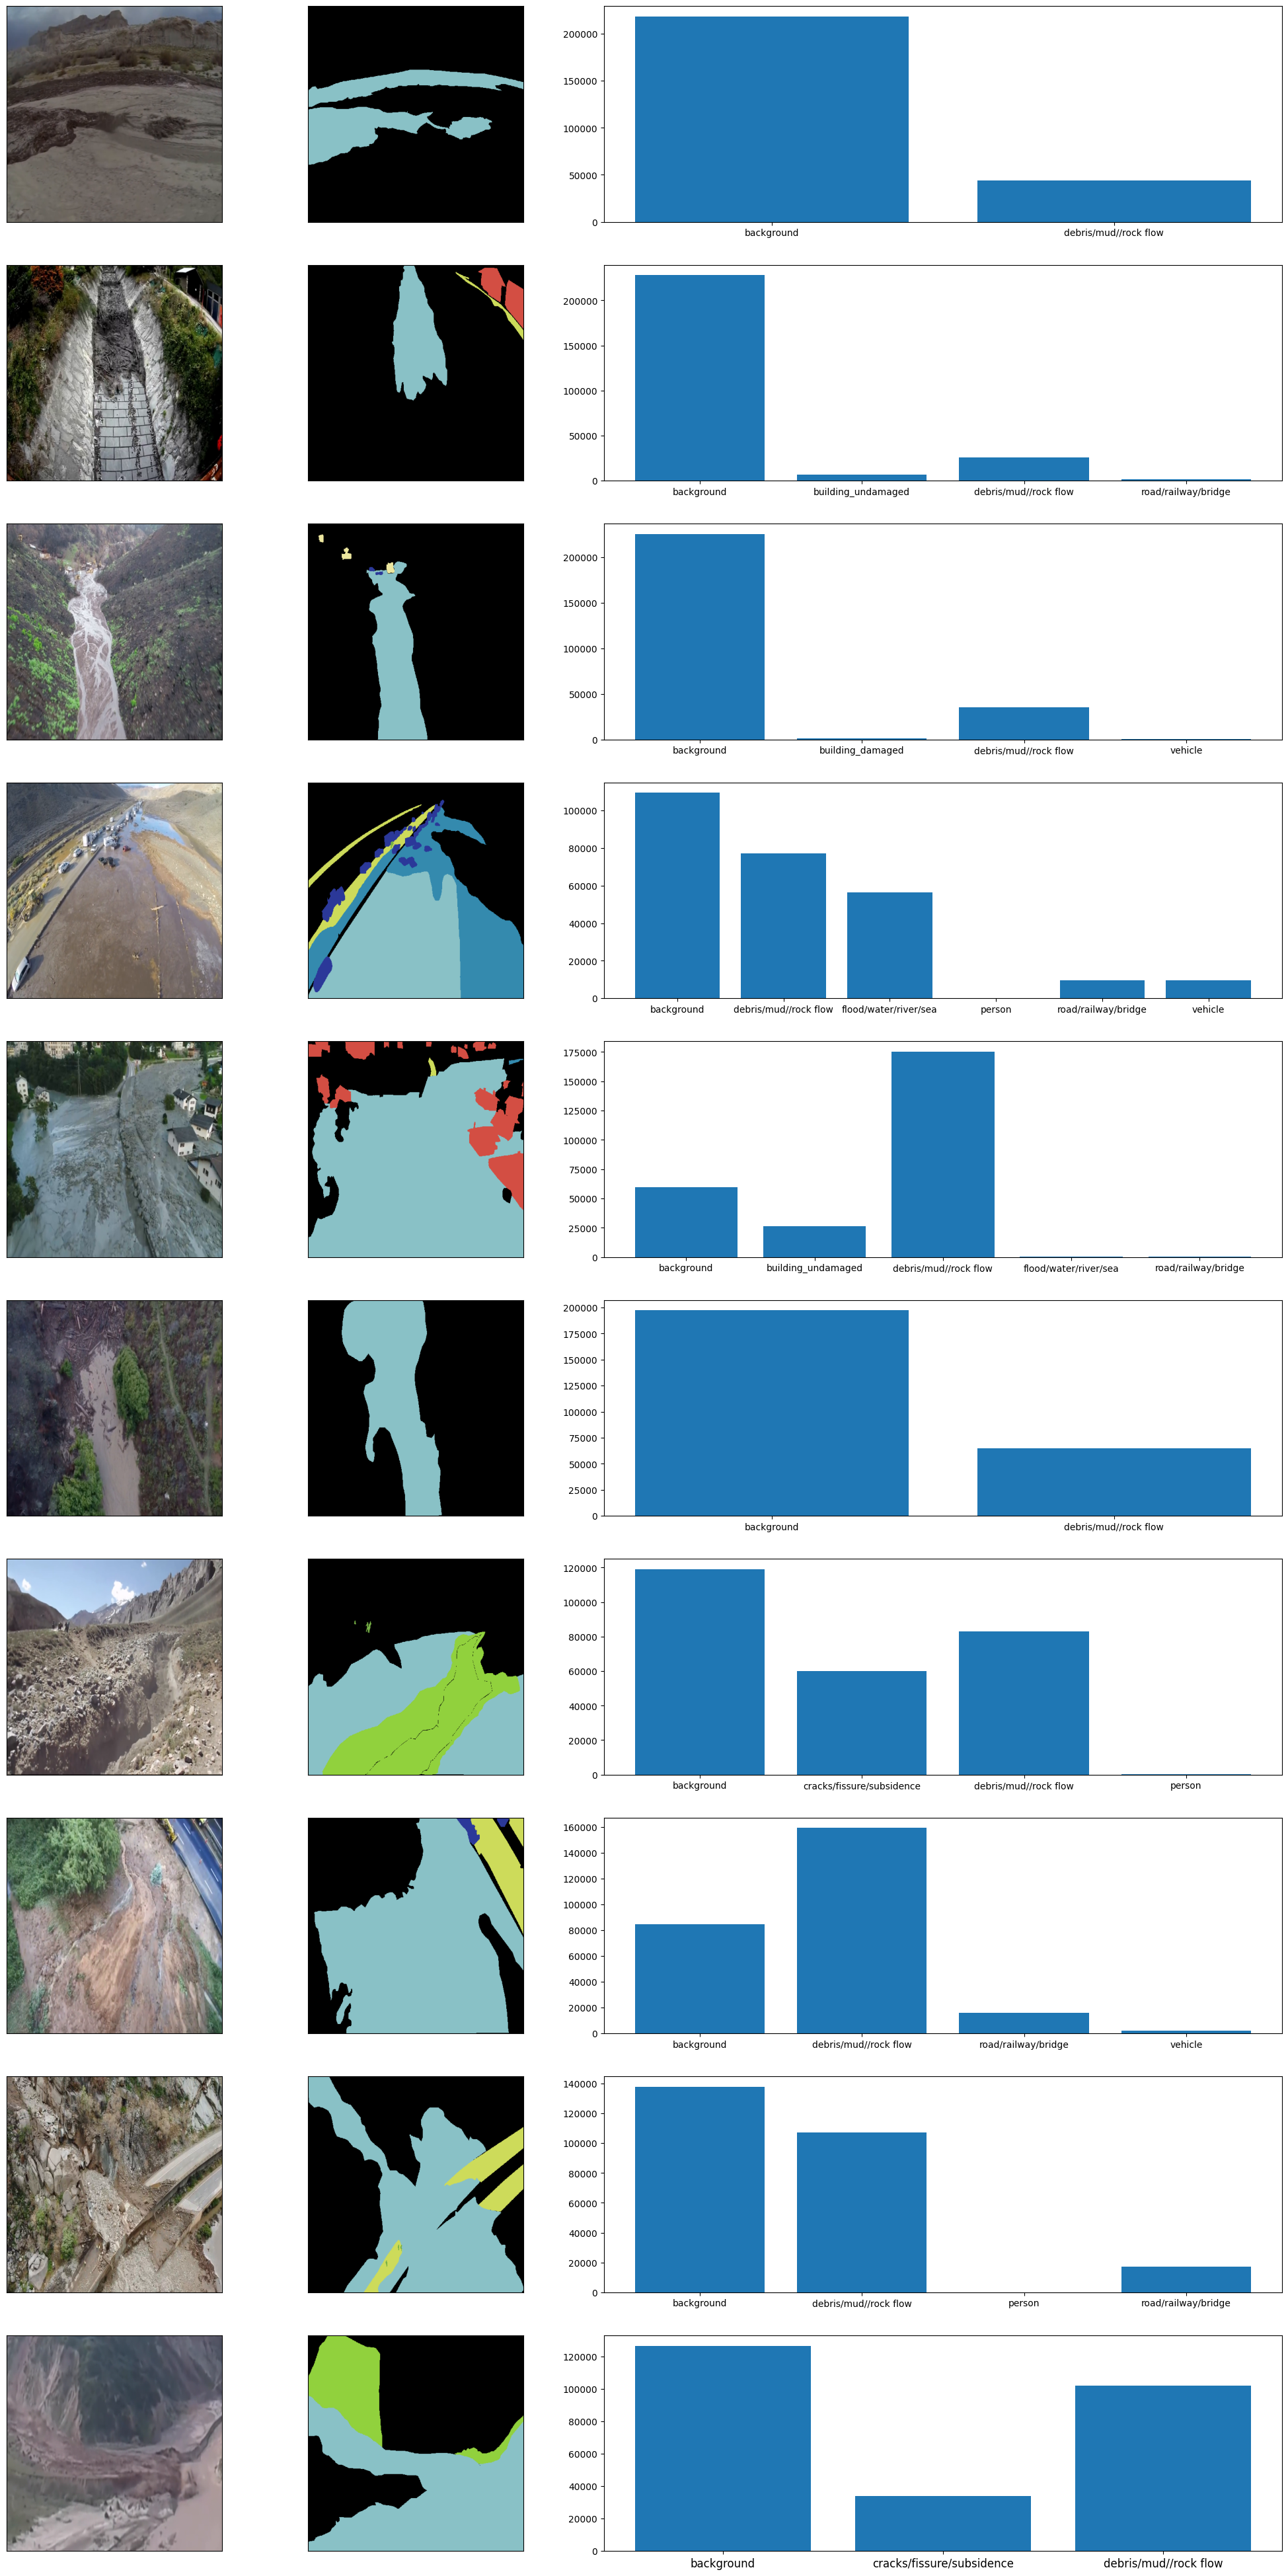

In [59]:
plot_images(TRAIN_PATH, GT_PATH, 10)

In [67]:
import cv2
import time

# calculating the porportion of area of classes in the image to the whole area of the image

def calc_classes_proportions(gt_images_path):
  t1 = time.time()

  img_names = os.listdir(gt_images_path)

  class_ps = {
      class_idx: 0
      for class_idx in class_names.keys()
  }

  img_path = os.path.join(gt_images_path, 'train_0000.png')
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  img_area = np.multiply(*img.shape)

  print(f'there are {len(img_names)} images')

  for img_name in img_names:
    gt_img_path = os.path.join(gt_images_path, img_name)
    gt_img = cv2.imread(gt_img_path, cv2.IMREAD_GRAYSCALE)
    gt_img = gt_img.ravel()

    img_class_ps = [
        np.sum(gt_img == int(class_idx)) / img_area
        for class_idx in class_names
    ]

    for class_idx in class_names:
      class_ps[class_idx] += img_class_ps[int(class_idx)]

  print('took {:.3f}s'.format(time.time() - t1))

  return class_ps



class_ps = calc_classes_proportions(GT_PATH)
class_names_to_ps = {
    class_names[class_idx]: class_ps[class_idx]
    for class_idx in class_ps
}
class_names_to_ps

{'background': 637.3631935119629,
 'avalanche': 13.562183380126953,
 'building_undamaged': 52.896114349365234,
 'building_damaged': 33.103824615478516,
 'cracks/fissure/subsidence': 49.93645095825195,
 'debris/mud//rock flow': 65.96470260620117,
 'fire/flare': 7.256305694580078,
 'flood/water/river/sea': 64.68658828735352,
 'ice_jam_flow': 15.498001098632812,
 'lava_flow': 4.566768646240234,
 'person': 0.48035430908203125,
 'pyroclastic_flow': 14.584426879882812,
 'road/railway/bridge': 54.91582489013672,
 'vehicle': 6.185260772705078}

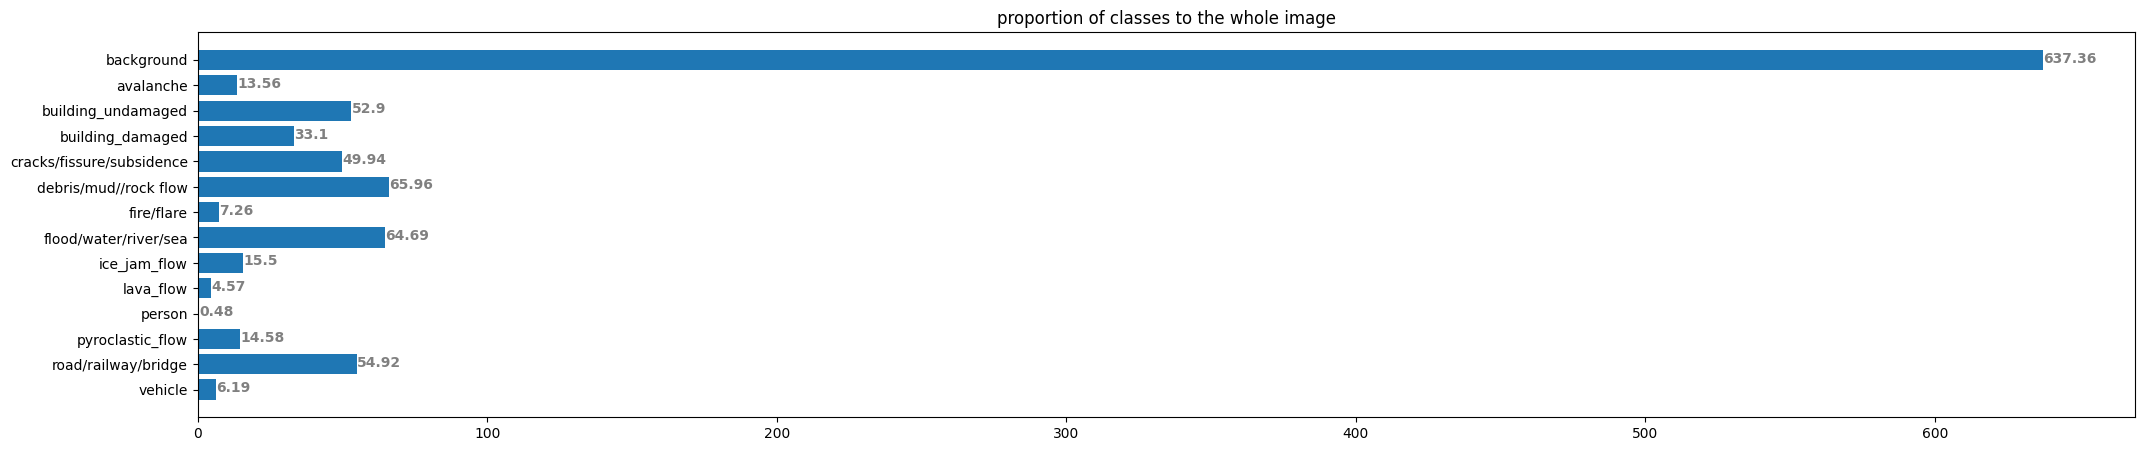

In [85]:
plt.figure(figsize=(25, 5))
plt.barh(list(class_names_to_ps.keys()), list(class_names_to_ps.values()))
plt.gca().set_title('proportion of classes to the whole image')

plt.gca().invert_yaxis()

for i in plt.gca().patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
